# Итоговая работа по курсу python для анализа данных

1. Загрузите файл HR.csv в pandas dataframe

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import metrics
%matplotlib inline

data_hr = pd.read_csv('HR.csv')
data_hr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [2]:
data_hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


2. Рассчитайте основные статистики для переменных(среднее,медиана,мода,мин/макс,сред.отклонение)

In [3]:
data_hr.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [4]:
"""Так как в общем расчете не указана мода, рассчитаю отдельной позицией, но мода равна 50% квантили"""
print('Значение моды уровня удовлетворенности работой:',data_hr['satisfaction_level'].round().mode()[0])
print('Значение моды времени с момента последней оценки в годах:',data_hr['last_evaluation'].round().mode()[0])
print('Значение моды количества проектов, выполненных за время работы:',data_hr['number_project'].round().mode()[0])
print('Значение моды среднего количества часов на рабочем месте в месяц:',data_hr['average_montly_hours'].round().mode()[0])
print('Значение моды стажа работы в компании в годах:',data_hr['time_spend_company'].round().mode()[0])
print('Значение моды несчастных случаев на рабочем месте с сотрудником:',data_hr['Work_accident'].round().mode()[0])
print('Значение моды параметра уволился ли сотрудник:',data_hr['left'].round().mode()[0])
print('Значение моды параметра повышался ли сотрудник за последние пять лет:',data_hr['promotion_last_5years'].round().mode()[0])

Значение моды уровня удовлетворенности работой: 1.0
Значение моды времени с момента последней оценки в годах: 1.0
Значение моды количества проектов, выполненных за время работы: 4
Значение моды среднего количества часов на рабочем месте в месяц: 135
Значение моды стажа работы в компании в годах: 3
Значение моды несчастных случаев на рабочем месте с сотрудником: 0
Значение моды параметра уволился ли сотрудник: 0
Значение моды параметра повышался ли сотрудник за последние пять лет: 0


3. Рассчитайте и визуализировать корреляционную матрицу для количественных переменных.Определите две самые скоррелированные и две наименее скоррелированные переменные.

In [5]:
data_hr.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


<AxesSubplot:>

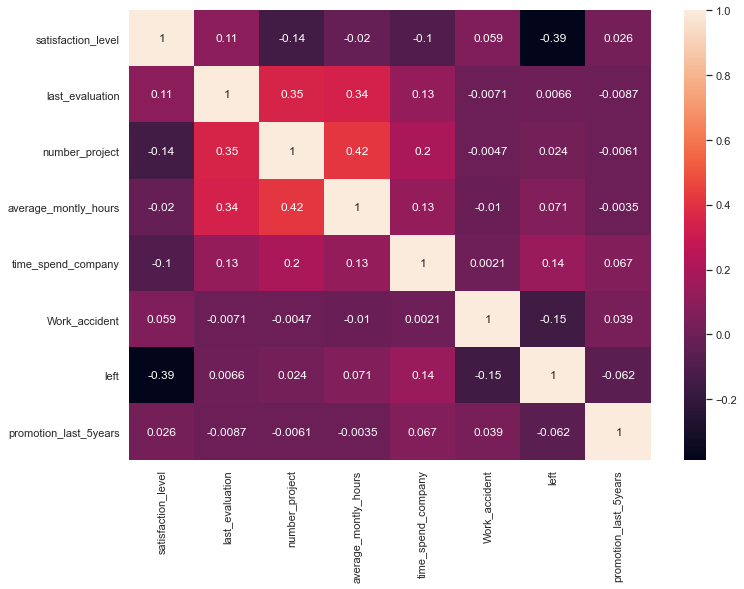

In [6]:
sns.set(rc={'figure.figsize': (11.7,8.27)})
sns.heatmap(data_hr.corr(),annot = True)

In [7]:
"""Переменные с высокой корреляцией: 
average_montly_hours (среднее количество часов на рабочем месте) и number_project (количество проектов на рабочем месте)
- прямая связь
left (увольнения) и satisfaction_level (уровень удовлетвореннсти работой) - обратная связь"""


"""Наименее скоррелированные переменные: 
time_spend_company(стаж работы в компании в годах) и Work_accident (несчастные случаи на рабоем месте с сотрудником)
average_montly_hours (среднее количество часов на рабочем месте)  и promotion_last_5years (повышался ли сотрудник за последние 5 лет)"""

'Наименее скоррелированные переменные: \ntime_spend_company(стаж работы в компании в годах) и Work_accident (несчастные случаи на рабоем месте с сотрудником)\naverage_montly_hours (среднее количество часов на рабочем месте)  и promotion_last_5years (повышался ли сотрудник за последние 5 лет)'

4. Рассчитайте сколько сотрудников работает в каждом департаменте.

In [8]:
data_hr_quantity = data_hr.groupby('department').agg({'department': 'count'})
data_hr_quantity = data_hr_quantity.rename(columns={ 'department': 'number of employees'})
data_hr_quantity 

,number of employees
department,
IT,1227
RandD,787
accounting,767
hr,739
management,630
marketing,858
product_mng,902
sales,4140
support,2229


5. Показать распределение сотрудников по зарплатам.

In [9]:
data_hr_salary = data_hr.groupby('salary').count()
data_hr_salary

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department
salary,,,,,,,,,
high,1237,1237,1237,1237,1237,1237,1237,1237,1237
low,7316,7316,7316,7316,7316,7316,7316,7316,7316
medium,6446,6446,6446,6446,6446,6446,6446,6446,6446


<AxesSubplot:title={'center':'Распределение сотрудников по зарплатам'}, xlabel='salary'>

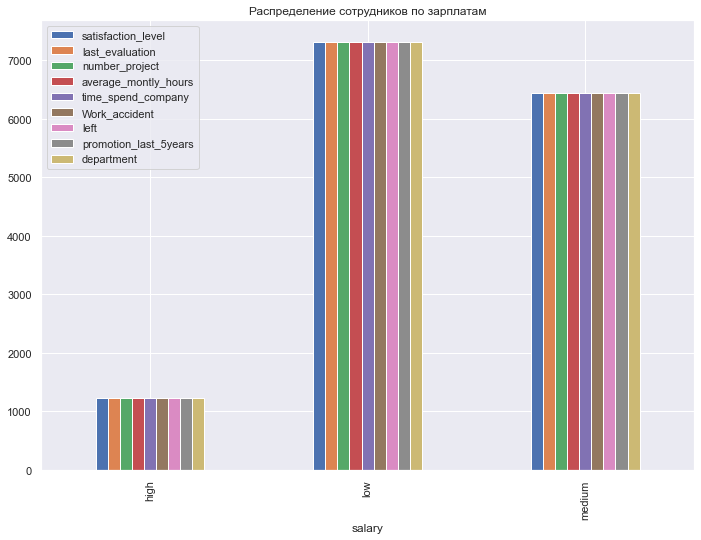

In [10]:
data_hr_salary.plot(kind='bar',title='Распределение сотрудников по зарплатам')

<AxesSubplot:>

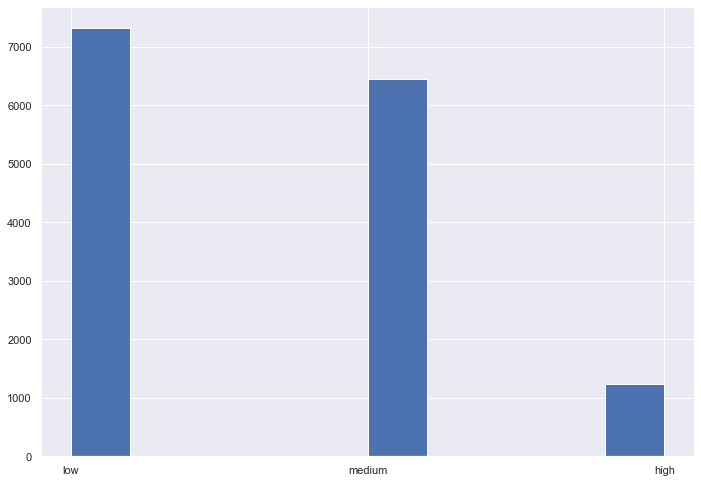

In [11]:
data_hr.salary.hist()

6. Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности

In [12]:
data_hr_salary_department = data_hr.pivot_table(index = 'salary', columns = 'department', values = 'satisfaction_level', aggfunc = 'count', fill_value = 0).head()
data_hr_salary_department

department,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
salary,,,,,,,,,,
high,83,51,74,45,225,80,68,269,141,201
low,609,364,358,335,180,402,451,2099,1146,1372
medium,535,372,335,359,225,376,383,1772,942,1147


<AxesSubplot:title={'center':'Распределение сотрудников по зарплатам по департаментам'}, xlabel='salary'>

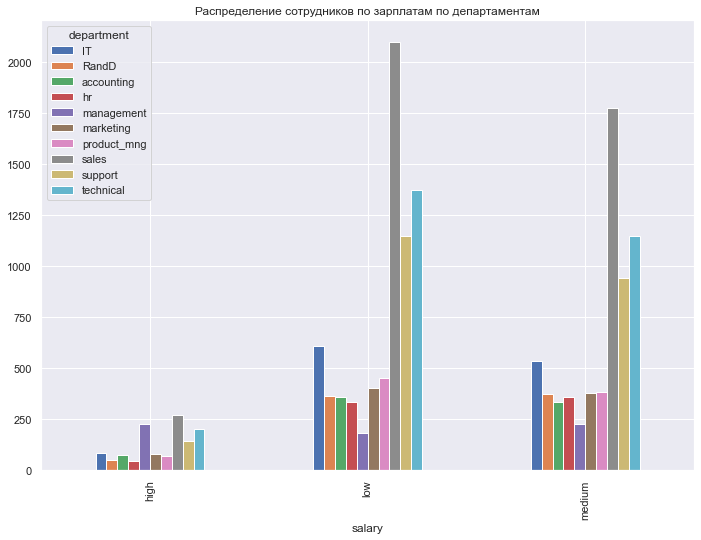

In [13]:
data_hr_salary_department.plot(kind='bar',title='Распределение сотрудников по зарплатам по департаментам')

7. Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

In [14]:
data_hr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [15]:
"""Выделяю в отдельный Data frame сотрудников с низкой зарплатой и оставляю 
только два столбца с относительным уровнем зарплаты и количества часов на рабочем месте в месяц"""
data_salary_low = data_hr.loc[data_hr['salary'].isin(['low'])].filter(items = ['salary', 'average_montly_hours'])
data_salary_low.describe()

,average_montly_hours
count,7316.000000
mean,200.996583
std,50.832214
min,96.000000
25%,155.000000
50%,199.000000
75%,246.000000
max,310.000000


In [16]:
data_salary_low

,salary,average_montly_hours
0,low,157
3,low,223
4,low,159
5,low,153
6,low,247
...,...,...
14994,low,151
14995,low,160
14996,low,143
14997,low,280


In [17]:
data_salary_high = data_hr.loc[data_hr['salary'].isin(['high'])].filter(items = ['salary', 'average_montly_hours'])
data_salary_high.describe()

,average_montly_hours
count,1237.000000
mean,199.867421
std,47.710446
min,96.000000
25%,161.000000
50%,199.000000
75%,241.000000
max,307.000000


In [18]:
data_salary_high

,salary,average_montly_hours
72,high,149
111,high,289
189,high,156
267,high,129
306,high,149
...,...,...
14829,high,148
14868,high,130
14902,high,159
14941,high,131


<AxesSubplot:>

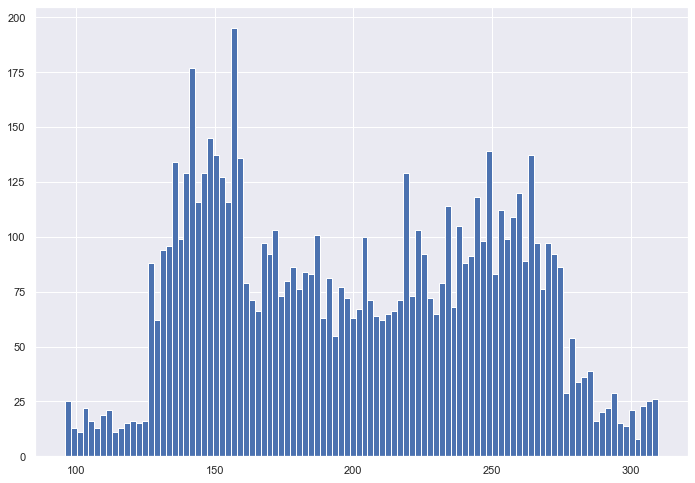

In [19]:
data_salary_low['average_montly_hours'].hist(bins=100)

<AxesSubplot:>

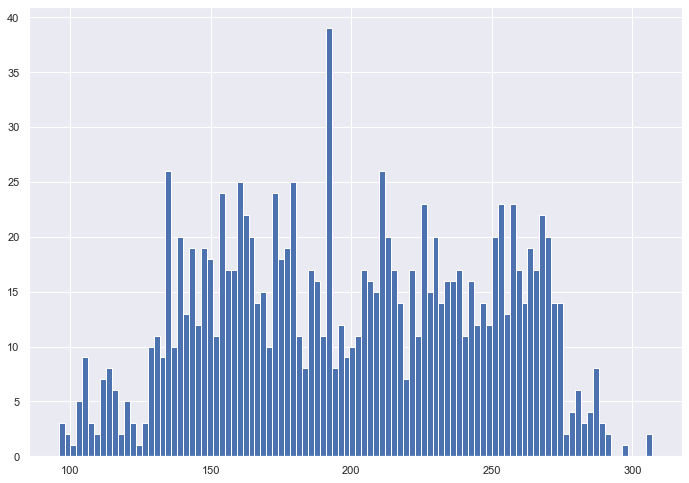

In [20]:
data_salary_high['average_montly_hours'].hist(bins=100)

Гипотезы:

H0: количество часов которые проводят сотрудники с высокой зарплатой и с низкой зарплатой на работе одинаковое

H1: количество часов которые проводят сотрудники с высокой зарплатой и с низкой зарплатой на работе различается

In [21]:
from scipy import stats as st
alpha = 0.05 # уровень значимости 
result = st.ttest_ind(data_salary_high['average_montly_hours'], data_salary_low['average_montly_hours'], equal_var=False)
print(result)
if (result.pvalue < alpha):
    print('Отвергаем нулевую гипотезу, количество часов которые проводят сотрудники с высокой зарплатой и с низкой зарплатой на работе различается')
else:
    print('Не отвергаем нулевую гипотезу, время которое проводят на работе сотрудники с низкой и высокой зарплатой одинаковое')

Ttest_indResult(statistic=-0.7624331665385475, pvalue=0.4459045542257889)
Не отвергаем нулевую гипотезу, время которое проводят на работе сотрудники с низкой и высокой зарплатой одинаковое


8. Рассчитать следующие показатели среди уволившихся и неуволившихся сотрудников (по отдельности):

●Доля сотрудников с повышением за последние 5 лет

●Средняя степень удовлетворенности

●Среднее количество проектов

In [22]:
"""Выделяю в отдельный Data frame только 4 нужных столбца"""
data_left = data_hr.filter(items = ['left', 'satisfaction_level','number_project','promotion_last_5years'])
data_left

,left,satisfaction_level,number_project,promotion_last_5years
0,1,0.38,2,0
1,1,0.80,5,0
2,1,0.11,7,0
3,1,0.72,5,0
4,1,0.37,2,0
...,...,...,...,...
14994,1,0.40,2,0
14995,1,0.37,2,0
14996,1,0.37,2,0
14997,1,0.11,6,0


In [23]:
"""Выделяю в отдельный Data frame неуволившихся сотрудников"""
data_left_0 = data_left.loc[(data_hr['left'] == 0)]
data_left_0

,left,satisfaction_level,number_project,promotion_last_5years
2000,0,0.58,4,0
2001,0,0.82,2,0
2002,0,0.45,5,0
2003,0,0.78,5,0
2004,0,0.49,3,0
...,...,...,...,...
14206,0,0.90,3,1
14207,0,0.74,5,1
14208,0,0.85,3,1
14209,0,0.33,3,1


In [24]:
print('Средняя степень удовлетворенности среди неуволившихся сотрудников:',data_left_0['satisfaction_level'].mean())

Средняя степень удовлетворенности среди неуволившихся сотрудников: 0.666809590479516


In [25]:
print('Среднее количество проектов среди неуволившихся сотрудников:',data_left_0['number_project'].mean())

Среднее количество проектов среди неуволившихся сотрудников: 3.786664333216661


In [26]:
promotion_1_left_0 = len(data_left_0.loc[(data_left_0['promotion_last_5years'] == 1)]) 
#Количество сотрудников с повышением за последние 5 лет среди неуволившихся
employees_0= len(data_left_0.left)
#Количество сотрудников неуволившихся
promotion_1_0 = (promotion_1_left_0 / employees_0)*100
print("""Доля сотрудников с повышением за последние 5 лет среди неуволившихся сотрудников %.1f процента""" % (promotion_1_0))

Доля сотрудников с повышением за последние 5 лет среди неуволившихся сотрудников 2.6 процента


In [27]:
"""Выделяю в отдельный Data frame уволившихся сотрудников"""
data_left_1 = data_left.loc[(data_hr['left'] == 1)]
data_left_1

,left,satisfaction_level,number_project,promotion_last_5years
0,1,0.38,2,0
1,1,0.80,5,0
2,1,0.11,7,0
3,1,0.72,5,0
4,1,0.37,2,0
...,...,...,...,...
14994,1,0.40,2,0
14995,1,0.37,2,0
14996,1,0.37,2,0
14997,1,0.11,6,0


In [28]:
print('Средняя степень удовлетворенности среди уволившихся сотрудников:',data_left_1['satisfaction_level'].mean())

Средняя степень удовлетворенности среди уволившихся сотрудников: 0.44009801176140917


In [29]:
print('Среднее количество проектов среди уволившихся сотрудников:',data_left_1['number_project'].mean())

Среднее количество проектов среди уволившихся сотрудников: 3.8555026603192384


In [30]:
promotion_1_left_1 = len(data_left_1.loc[(data_left_1['promotion_last_5years'] == 1)]) 
#Количество сотрудников с повышением за последние 5 лет среди уволившихся
employees_1= len(data_left_1.left)
#Количество сотрудников неуволившихся
promotion_1_1 = (promotion_1_left_1 / employees_1)*100
print("""Доля сотрудников с повышением за последние 5 лет среди уволившихся сотрудников %.1f процента""" % (promotion_1_1))

Доля сотрудников с повышением за последние 5 лет среди уволившихся сотрудников 0.5 процента


9. Разделить данные на тестовую и обучающую выборкиПостроить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary) Оценить качество модели на тестовой выборки

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

In [32]:
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)

In [33]:

"""Преобразую столбец DataFrame 'left'  в виде массива NumPy"""
data_class = data_left.left.values
data_class

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [34]:
len(data_class)

14999

In [35]:
"""Выделяю в отдельный Data frame только нужные столбцы, исключаю категориальные переменные"""
data_left_= data_hr.filter(items = ['satisfaction_level','average_montly_hours',
                                     'time_spend_company'])
data_left_

,satisfaction_level,average_montly_hours,time_spend_company
0,0.38,157,3
1,0.80,262,6
2,0.11,272,4
3,0.72,223,5
4,0.37,159,3
...,...,...,...
14994,0.40,151,3
14995,0.37,160,3
14996,0.37,143,3
14997,0.11,280,4


In [38]:
# разделяем выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_left_, data_class, test_size=0.25)

In [39]:
# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [40]:
lda = LinearDiscriminantAnalysis()

In [41]:
# обучаем данные
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [42]:
# делаем прогноз на тренировочной выборке
lda.predict(X_train)

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [43]:
# смотрим разницу факта и прогноза
result = pd.DataFrame([y_test, lda.predict(X_test)]).T
result

,0,1
0,0,0
1,0,0
2,1,0
3,1,1
4,1,0
...,...,...
3745,0,0
3746,1,1
3747,0,0
3748,0,0


In [44]:
# расчет точности 
from sklearn.metrics import accuracy_score
accuracy_score(y_train, lda.predict(X_train))

0.7587341096986399

In [45]:
# расчет точности на тестовых данных 
accuracy_score(y_test, lda.predict(X_test))

0.7661333333333333

In [46]:
# коэффициенты дискриминатных линий
lda.coef_

array([[-4.24065066e+00,  2.50204284e-03,  1.78909329e-01]])

In [47]:
lda.means_

array([[  0.66607401, 198.81708168,   3.38771236],
       [  0.44189077, 205.91676083,   3.86440678]])

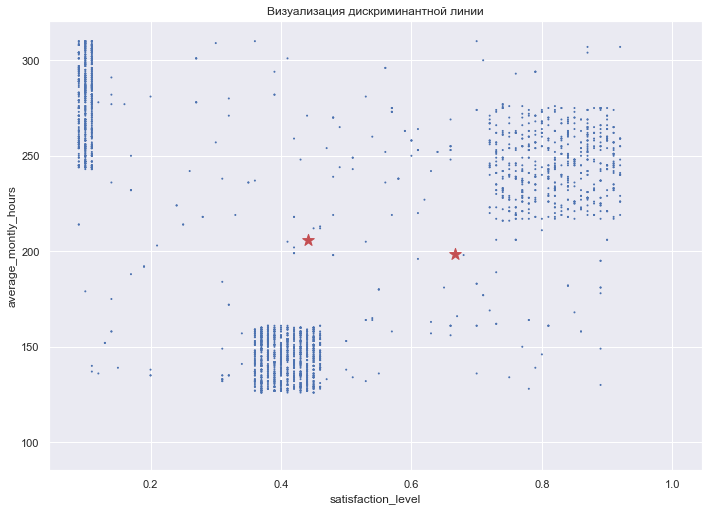

In [48]:
# визуализируем дискриминантную линию на основе двух признаков уровня удвлетворености и времени проведенного на работе 
plt.scatter(X_train['satisfaction_level'], X_train['average_montly_hours'], y_train)
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=150, marker='*')
plt.ylabel('average_montly_hours')
plt.xlabel('satisfaction_level')
plt.title('Визуализация дискриминантной линии')
plt.show()

In [49]:
small_train = X_train[['satisfaction_level', 'average_montly_hours']]
small_test = X_test[['satisfaction_level', 'average_montly_hours']]

In [50]:
lda_test = LinearDiscriminantAnalysis()
lda_test.fit(small_test, y_test)
lda_test.means_

array([[  0.66904023, 199.79745942],
       [  0.43490175, 211.77401747]])

<ipython-input-58-00147b5ccf75>:13: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',


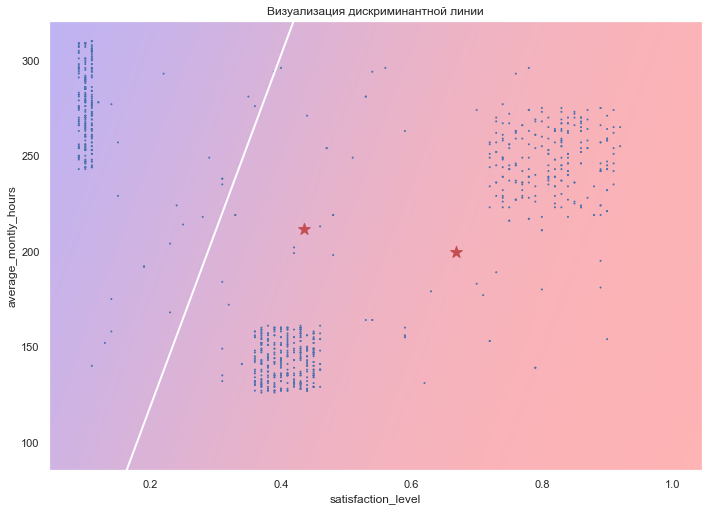

In [58]:
# Визуализируем на данных для тестовых данных
plt.scatter(small_test['satisfaction_level'],small_test['average_montly_hours'], y_test)
plt.scatter(lda_test.means_[:, 0], lda_test.means_[:, 1], c='r', s=150, marker='*')
# делаем условную "сетку"
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx), np.linspace(y_min, y_max, ny))
# предсказываем класс каждой точки нашей сетки
Z = lda_test.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)
# закрашиваем классы разными цветами
plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.), zorder=-1)
# отделяем друг от друга
plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')
plt.ylabel('average_montly_hours')
plt.xlabel('satisfaction_level')
plt.title('Визуализация дискриминантной линии')
plt.show()

Расчет точности точности модели не самый лучший - 76%, много ошибок в модели, но для примера в жизни это наверное норма. Визулизация также показала, что модель не может точно предсказать на основе имеющихся признаков, уволился ли сотрудник.


Мы можем оценить, насколько хорошо модель работает, используя многократную стратифицированную перекрестную проверку в k-кратном размере. Будем использовать 10 складок и 3 повтора:

In [63]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
cv = RepeatedStratifiedKFold (n_splits = 10 , n_repeats = 3 , random_state = 1 )
scores = cross_val_score(lda_test, small_test, y_test, scoring='accuracy', cv=cv, n_jobs=-1)
print(np.mean(scores))

0.7689777777777778


Мы видим, что модель показала среднюю точность  76,89 %

Используем модель, чтобы предсказать, уолился человек или нет , на основе входных значений:
    - Уровень удовлетворенности работой 'satisfaction_level';
    - Среднее количество часов на рабочем месте в месяц 'average_montly_hours'.

In [64]:
new = [.2, 300]

In [65]:
lda_test.predict([new])

array([1], dtype=int64)

Мы можем видеть, что модель предсказывает, что это человек на осноове новых данных близок к увольнению или же уже уволился.

Создаем график LDA, чтобы просмотреть линейные дискриминанты модели и визуализировать, насколько хорошо он разделил два вида в нашем наборе данных:

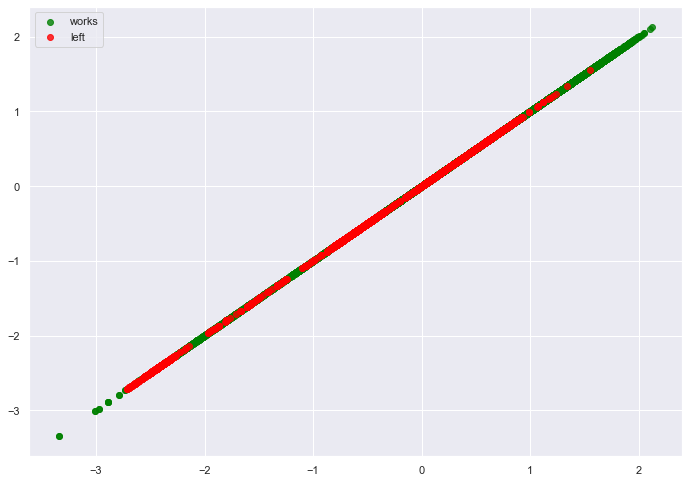

In [113]:
X = data_left_.values.reshape(-1, 3) 
y = data_class

model = LinearDiscriminantAnalysis()
data_plot = model.fit(X, y).transform(X)
class_ = np.array(['works','left'])
plt.figure()
colors = ['green','red']
lw = 2
for color, i, d in zip(colors, [0, 1], class_):
    plt.scatter(data_plot[y == i], data_plot[y == i], alpha=.8, color=color,
                label=d)
# plt.scatter(data_plot[y == 1, 0], data_plot[y == 1, 0], alpha=.8, color = 'green', label='works')
        
#add legend to plot
plt.legend(loc='best', shadow=False, scatterpoints=1)

#display LDA plot
plt.show()